In [74]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

from PIL import Image
from random import randint

### DATA
I read the test data as panda data frame and convert it to numpy.

In [75]:
test = pd.read_csv("iris_new_data.csv", header=None, skip_blank_lines=False, delim_whitespace=True)

In [76]:
iris_np = pd.DataFrame.to_numpy(test)
#print(iris_array[0:10])

### Normalization

In [77]:
# Normalization
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(iris_np)  
iris_np = transformer.transform(iris_np)
print(iris_np[0][0:5])

[0.77381111 0.59732787 0.2036345  0.05430253]


### Visualising the data

1) I have visualize it with the 3 feature of the 4 fetures.
2) I have also visualize it the 2 D version with the reduction of the dimention to 2 with PCA.

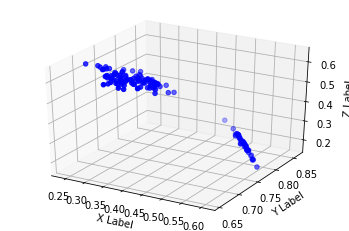

In [78]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_np[:, 1], iris_np[:, 0], iris_np[:, 2], c='b', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


plt.show()


In [79]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(2)
reduced_train = pca.fit_transform(iris_np)
print(reduced_train[0][0:5])

[ 0.32374453 -0.05794418]


<Figure size 432x288 with 0 Axes>

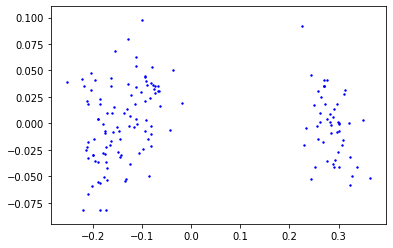

In [80]:
fig = plt.figure()

fig, ax = plt.subplots()
for i in range(1):
        ax.scatter(reduced_train[:, 0], reduced_train[:, 1], s=2, c='b')

# K-Mean

In this section I used my own K-Mean Impelimentation. 
Some Imporatant note about it :

    1)I impelimented Kmean++.
    2)To get the best KMean. I run the algorithem 10 times and get the one with the least error.
    3)I used euclidean distance.
    4)The K-Mean class is in the KMean file.

In [91]:
from KMean import *
import time
start_time = time.time()

Error = np.zeros((10,3))
label = np.zeros((10,150))
centroid = np.zeros((10,3,4))
for i in range (10):
    Kmean_Irish = KMeans(iris_np, 3, 4)
    Kmean_Irish.Random_centroid()
    Error[i], label[i], centroid[i]= Kmean_Irish.Main(30)
    
print("--- %s seconds ---" % (time.time() - start_time))



100%|██████████| 30/30 [00:00<00:00, 2596.29it/s]

--- 0.1877439022064209 seconds ---


In [90]:
Error_final = Error.sum(axis=1)
print(Error)
print(Error_final)
Best_KMean = np.argmin(Error_final)
print(Best_KMean)
print(Error_final[Best_KMean])

[[6.25563126 0.81100471 0.84560128]
 [6.25563126 0.81100471 0.84560128]
 [2.49441473 2.03316191 1.71728029]
 [2.03316191 2.49441473 1.71728029]
 [6.25563126 0.81100471 0.84560128]
 [6.25563126 0.81100471 0.84560128]
 [2.03316191 2.49441473 1.71728029]
 [6.25563126 0.81100471 0.84560128]
 [6.25563126 0.81100471 0.84560128]
 [6.25563126 0.81100471 0.84560128]]
[7.91223726 7.91223726 6.24485693 6.24485693 7.91223726 7.91223726
 6.24485693 7.91223726 7.91223726 7.91223726]
2
6.24485692728523


In [83]:
label_Final = label[Best_KMean].astype(int)

### Visualizing the classification result

Each class is collerd with one color and the centroids are shown as a black dots.
1) The 3D representation with 3 of 4 features.
2) The 2D representation with 2 of 4 features.

In [84]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

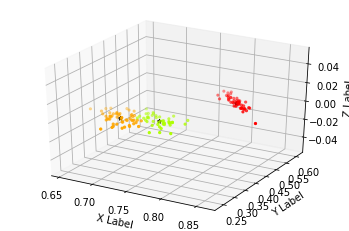

In [85]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import matplotlib.pyplot as plt

matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cmap = get_cmap(10)


for i in range(3):
    ax.scatter(iris_np[label[Best_KMean]==i][:, 0], iris_np[label[Best_KMean]==i][:, 1], s=5, c=cmap(i))
    ax.scatter(centroid[Best_KMean][i, 0], centroid[Best_KMean][i, 1], marker='*', s=15, c='#050505')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<Figure size 432x288 with 0 Axes>

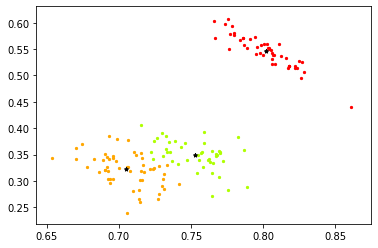

In [86]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import matplotlib.pyplot as plt

matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure()

cmap = get_cmap(10)
fig, ax = plt.subplots()
for i in range(3):
        ax.scatter(iris_np[label[Best_KMean]==i][:, 0], iris_np[label[Best_KMean]==i][:, 1], s=5, c=cmap(i))
        ax.scatter(centroid[Best_KMean][i, 0], centroid[Best_KMean][i, 1], marker='*', s=15, c='#050505')


In [88]:
np.savetxt("iris_submission" + ".txt", label_Final, fmt='%s')